![ups logo](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Logo_Universidad_Polit%C3%A9cnica_Salesiana_del_Ecuador.png/640px-Logo_Universidad_Polit%C3%A9cnica_Salesiana_del_Ecuador.png)

# Aprendizaje Automático P64

# Practica 02


## Redes Neuronales Problemas Multiclase y Optimización (fine tunning)

## Fase 3: Evaluación y predicción del modelo optimizado

## Autor: Diego Tapia

### Importación de librerias

In [1]:
%pip install scikeras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from time import time
from datetime import datetime, timedelta

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
import seaborn as sns
import copy

from sklearn.model_selection import train_test_split
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from keras.layers import Dropout

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.models import model_from_json
from keras.models import load_model

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn import set_config

print("Módulos y clases importados")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 14.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.
Módulos y clases importados


### Carga del dataset

Se carga el dataset CIFAR10 de la libreria de keras

In [2]:
from tensorflow.keras.datasets import cifar10
cifar10.load_data()
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


### Transformación de los datos

Se transforman las imágenes para ser usadas en una red neuronal clásica

In [3]:
# Normalizamos tanto X_train como X_test, en este caso de forma sencilla porque los valores de los pixeles van de 0 a 255.
x_train = X_train/255
x_test = X_test/255
print("Normalización lista!")

#Ejemplo para verificar
print('x:',X_test[9999,1,1,1])
print("""x':""",x_test[9999,1,1,1])

Normalización lista!
x: 89
x': 0.34901960784313724


In [4]:
#Para transformar X en estructura clásica de ML (2D) para aplicar técnicas como SVM, Redes Neuronales Densas, KNN, etc.
X_trainReshapeImageRow=x_train.reshape((x_train.shape[0],3072))
print(X_trainReshapeImageRow.shape)
X_testReshapeImageRow=x_test.reshape((x_test.shape[0],3072))
print(X_testReshapeImageRow.shape)

(50000, 3072)
(10000, 3072)


### Creación del modelo optimizado


Se crea el modelo con los mejores parámetros de compilación y densidad encontrados en la fase 2.

- epochs = 75
- batch_size = 256
- optimizer = RMSprops
- capa 1 = 48
- capa 2 = 48
- dropout = 0


In [5]:
def create_model():

  model = Sequential([
      Dense(48, input_dim=X_trainReshapeImageRow.shape[1], activation='relu'),
      Dense(48, activation='relu'),
      Dense(10, activation='softmax')
  ])

  model.compile(loss='sparse_categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

  return model



### Entrenamiento del modelo optimizado

In [6]:
modelo_optimizado = create_model()

modelo_optimizado.fit(X_trainReshapeImageRow, y_train, batch_size=256, epochs=75, verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/75
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1884 - loss: 2.2708
Epoch 2/75
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3036 - loss: 1.9273
Epoch 3/75
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3376 - loss: 1.8533
Epoch 4/75
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3563 - loss: 1.7874
Epoch 5/75
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3647 - loss: 1.7635
Epoch 6/75
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3774 - loss: 1.7358
Epoch 7/75
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3888 - loss: 1.7124
Epoch 8/75
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3922 - loss: 1.6908
Epoch 9/75
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3969 - loss: 1.6818
Epoch 10/75
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4075 - loss: 1.6631
Epoch 11/75
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4145 - loss: 1.6467
Epoch 12/75
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [7]:
# Se guarda el modelo en un archivo
modelo_optimizado.save('modelo_optimizado.h5')

In [ ]:
#from keras.models import load_model

# Cargar el modelo desde el archivo .h5
#modelo_optimizado = load_model('modelo_optimizado.h5')


### Evaluación del modelo optimizado


In [8]:
#Predicciones con el conjunto de Test
import pandas as pd

y_pred = modelo_optimizado.predict(X_testReshapeImageRow)

print("y_pred antes del aplanado")
y_pred_df = pd.DataFrame(y_pred, columns=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(y_pred_df.tail(3))
#argmax identifica el valor máximo para determinar la categoría
y_pred = np.argmax(y_pred, axis=-1)

y_pred = y_pred.flatten()
y_test_f = y_test.flatten()

dataframeFinal=pd.DataFrame({'real':y_test_f, 'predicción': y_pred})
np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})
dataframeFinal.head(10)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
y_pred antes del aplanado
      airplane  automobile      bird       cat      deer       dog      frog  \
9997  0.002402    0.000663  0.087567  0.501463  0.093141  0.268462  0.007441   
9998  0.059113    0.015204  0.179205  0.159822  0.085405  0.271041  0.125727   
9999  0.025487    0.001742  0.242954  0.083314  0.396461  0.075911  0.069793   

         horse      ship     truck  
9997  0.029526  0.008934  0.000400  
9998  0.032298  0.014115  0.058071  
9999  0.093165  0.006607  0.004566  


,real,predicción
0,3,3
1,8,8
2,8,1
3,0,8
4,6,4
5,6,6
6,1,3
7,6,6
8,3,5
9,1,1


Se obtiene la matriz de confusión del modelo

Accuracy  Precision  Recall  F1-score
0.4261    0.4699    0.4261    0.4469


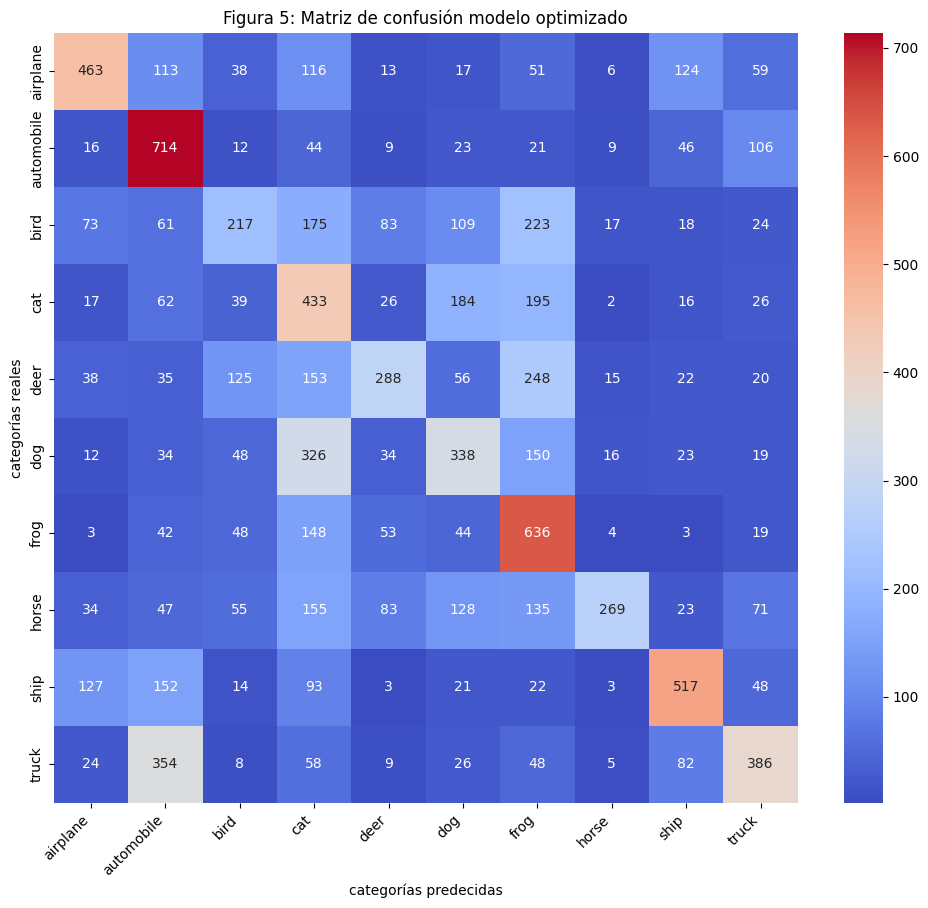

In [10]:
# Calcular metricas de evaluacion
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

def _load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def evaluar_modelo(y_test, y_pred):
  # Calcular la matriz de confusión
  conf_matrix = confusion_matrix(y_test, y_pred)

  # Calcular las métricas de evaluación a partir de la matriz de confusión
  tp = np.diag(conf_matrix)
  fp = np.sum(conf_matrix, axis=0) - tp
  fn = np.sum(conf_matrix, axis=1) - tp

  accuracy = np.mean(tp / (tp + fn))
  precision = np.mean(tp / (tp + fp))
  recall = np.mean(tp / (tp + fn))
  f1 = 2 * precision * recall / (precision + recall)

  # Imprimir resultados
  print("Accuracy  Precision  Recall  F1-score")
  print(f"{accuracy:.4f}    {precision:.4f}    {recall:.4f}    {f1:.4f}")

  # Crear el plot de la matriz de confusión
  plt.figure(figsize=(12, 10))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')

  # Añadir etiquetas y título
  plt.xlabel('categorías predecidas')
  plt.ylabel('categorías reales')
  plt.xticks(np.arange(conf_matrix.shape[0])+0.5, labels=_load_label_names(),rotation=45, ha="right")
  plt.yticks(np.arange(conf_matrix.shape[1])+0.5, labels=_load_label_names())
  plt.title('Figura 5: Matriz de confusión modelo optimizado')

  # Mostrar el plot
  plt.show()

evaluar_modelo(y_test, y_pred)

Como se puede observar en la matriz de confusión (Figura 5) del modelo optimizado, la clase que mejor se predice es la "automobile" (automóvil) teniendo 714 clasificaciones correctas. También se puede ver un incremento de clasificaciones correctas de la clase "frog" que fue la que más clasificaciones correctas tenía en el modelo base.

### Predicciones

Se realiza predicciones con el modelo optimizado usando una imagen del conjunto de test y otra externa, las imágenes van a ser de automóviles que es lo que mejor clasifica este modelo.

#### Predicción de una imagen específica del conjunto de datos de Test

In [16]:
import numpy
import matplotlib.pyplot as plt
from PIL import Image

label_names = _load_label_names()

print('Imagen:')
sample_id=7487
sample_image=X_test[sample_id]
print(sample_image.shape)
sample_label=y_test[sample_id][0]
print('Etiqueta real - Etiqueta Id: {} Nombre: {}'.format(sample_label, label_names[sample_label]))

Imagen:
(32, 32, 3)
Etiqueta real - Etiqueta Id: 1 Nombre: automobile


Predicciones:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[0 1 0 0 0 0 0 0 0 0]
certeza:  88.2463%
Max : 0.8824625
Lista de indices de máximo elemento : 1
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Etiqueta predicción:  automobile


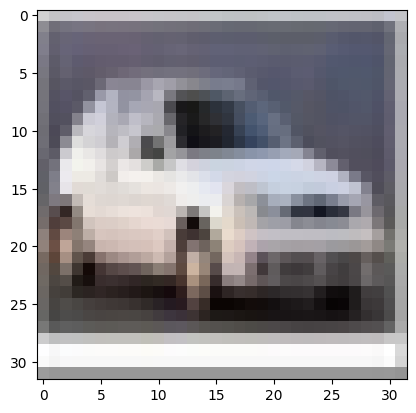

In [18]:
print('Predicciones:')
sample_image_trans = X_testReshapeImageRow[sample_id]
sample_imageTrans = numpy.expand_dims(sample_image_trans, axis=0)
resultados = modelo_optimizado.predict(sample_imageTrans)[0]
print(resultados)
maxElement = numpy.amax(resultados)
print('certeza: ', str(round(maxElement*100, 4))+'%')
result = numpy.where(resultados == numpy.amax(resultados))
print('Max :', maxElement)
#print('Returned tuple of arrays :', result)
print('Lista de indices de máximo elemento :', result[0][0])
index_sample_label=result[0][0]

print(label_names)
print('Etiqueta predicción: ', label_names[index_sample_label])

img=sample_image
plt.imshow(img)

#Guardar imagen
#plt.savefig('Imagenes/imagen1.png')

#data = numpy.random.random((100,100))
#Rescale to 0-255 and convert to uint8
#rescaled = (255.0 / data.max() * (data - data.min())).astype(np.uint8)

im = Image.fromarray(sample_image)
im.save('imagen_predecida_1.png')

#### Predicción de una imagen desde un Path

In [21]:
print('Imagen:')
img = Image.open('/content/drive/MyDrive/MachineLearning/Imagenes/auto_test.jpg').convert('RGB')
arr = np.array(img)
print(arr.shape)


Imagen:
(32, 32, 3)


In [22]:
# Se transforma la imagen
arr = arr/255
image_transformed = arr.reshape(-1, 3072)
print(image_transformed.shape)

(1, 3072)


Predicciones:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[0 0 0 0 0 0 0 0 0 0]
certeza:  23.509%
Max : 0.2350896
Lista de indices de máximo elemento : 9
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Etiqueta predicción:  truck


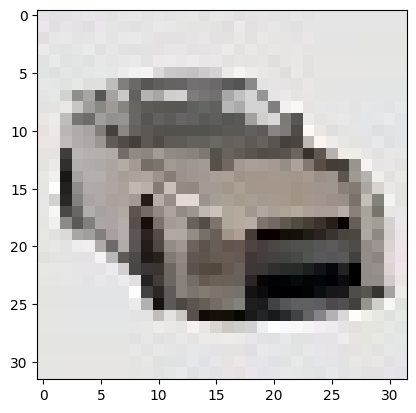

In [24]:
print('Predicciones:')

resultados = modelo_optimizado.predict(image_transformed)[0]
print(resultados)
maxElement = numpy.amax(resultados)
print('certeza: ', str(round(maxElement*100, 4))+'%')
result = numpy.where(resultados == numpy.amax(resultados))
print('Max :', maxElement)
#print('Returned tuple of arrays :', result)
print('Lista de indices de máximo elemento :', result[0][0])
index_sample_label=result[0][0]

print(label_names)
print('Etiqueta predicción: ', label_names[index_sample_label])


plt.imshow(img)



otro ejemplo de predicción con una imagen externa

In [26]:
print('Imagen:')
img = Image.open('/content/drive/MyDrive/MachineLearning/Imagenes/auto_test2.png').convert('RGB')
arr = np.array(img)
print(arr.shape)

Imagen:
(32, 32, 3)


In [27]:
# Se transforma la imagen
arr = arr/255
image_transformed = arr.reshape(-1, 3072)
print(image_transformed.shape)

(1, 3072)


Predicciones:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[0 1 0 0 0 0 0 0 0 0]
certeza:  60.8685%
Max : 0.6086846
Lista de indices de máximo elemento : 1
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Etiqueta predicción:  automobile


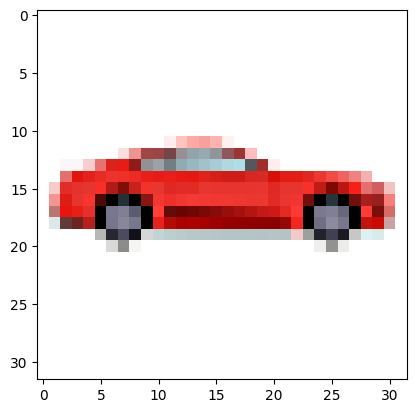

In [28]:
print('Predicciones:')

resultados = modelo_optimizado.predict(image_transformed)[0]
print(resultados)
maxElement = numpy.amax(resultados)
print('certeza: ', str(round(maxElement*100, 4))+'%')
result = numpy.where(resultados == numpy.amax(resultados))
print('Max :', maxElement)
#print('Returned tuple of arrays :', result)
print('Lista de indices de máximo elemento :', result[0][0])
index_sample_label=result[0][0]

print(label_names)
print('Etiqueta predicción: ', label_names[index_sample_label])


plt.imshow(img)


### Comparación modelo base vs modelo optimizado

Tabla 2. Comparación modelo base vs modelo optimizado, medidas de evaluación

| Modelo | accuracy | precision | recall | f1-score |
|--------|----------|-----------|--------|----------|
|base    |  0.3197 | 0.3154| 0.3197|0.3195|
|optimizado| 0.4261 | 0.4699 | 0.4261| 0.4469|

# Conclusiones

Como se puede ver en las medidas de evaluación de la tabla 2, el modelo optimizado tiene mejor rendimiento en comparación con el modelo base. Debido a la falta de una CPU o GPU de alto rendimiento y también de tiempo no se puede encontrar mejores valores, aunque por los resultados se puede asumir que a un mayor número de epocas, batchsize , neuronas en la capa 1 y 2, se obtendrían mejores resultados. También está el hecho de que estamos usando una red neuronal densa la cual no es la mejor opción para tratar con imágenes, una mejor opción es la red neuronal convolucional. Para usar la red neuronal densa las imágenes tuvieron que ser transformadas, de una matriz de 3 canales (RGB), a un array de una dimensión.


# Referencias
Jesús. (2020, July 1). ¿Qué es CIFAR-10? DataSmarts Español. https://datasmarts.net/es/que-es-cifar-10/

Ortiz, I. R. H., PhD. (2023a, December 23). Deep Learning - Redes Neuronales Convolucionales (CNN) - Clasificación de Imágenes con CIFAR10 - GenSciNet. GenSciNet. https://genscinet.com/deep-learning-cnn-cifar10/

Ortiz, I. R. H., PhD. (2023b, December 23). Preparación de datos: análisis exploratorio - GenSciNet. GenSciNet. https://genscinet.com/analisis-exploratorio/